# Binary Classification with Keras

In [5]:
import numpy as np
import matplotlib.pyplot as pl

import tensorflow.keras.layers as layers
import tensorflow.keras.models as models
import tensorflow.keras.losses as losses
import tensorflow.keras.optimizers as optimizers

## Build a model

In [6]:
model = models.Sequential([
    layers.Input(shape=(2,)),
    layers.Dense(1, activation='sigmoid'),
])

In [7]:
model.compile(
    loss=losses.BinaryCrossentropy(),
    optimizer=optimizers.SGD(learning_rate=1e-3),
    metrics=['acc']
)

In [8]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


## Load the data

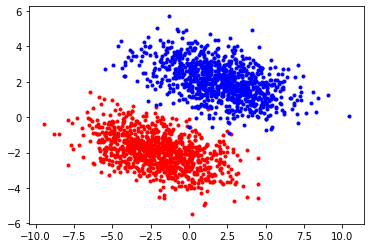

In [14]:
data = np.loadtxt('./linear_classifier_data.csv', delimiter=',', skiprows=1)
x_data = data[:, [0, 1]]
y_data = data[:, -1].astype(int)

pl.plot(x_data[y_data==0, 0], x_data[y_data==0, 1], '.', color='red')
pl.plot(x_data[y_data==1, 0], x_data[y_data==1, 1], '.', color='blue')

## Training

In [22]:
model.fit(x_data, y_data, epochs=10)

Epoch 1/10
63/63 [==============================] - 0s 715us/step - loss: 0.0742 - acc: 0.9940
Epoch 2/10
63/63 [==============================] - 0s 674us/step - loss: 0.0734 - acc: 0.9940
Epoch 3/10
63/63 [==============================] - 0s 671us/step - loss: 0.0727 - acc: 0.9940
Epoch 4/10
63/63 [==============================] - 0s 627us/step - loss: 0.0720 - acc: 0.9940
Epoch 5/10
63/63 [==============================] - 0s 611us/step - loss: 0.0713 - acc: 0.9940
Epoch 6/10
63/63 [==============================] - 0s 617us/step - loss: 0.0707 - acc: 0.9945
Epoch 7/10
63/63 [==============================] - 0s 663us/step - loss: 0.0700 - acc: 0.9945
Epoch 8/10
63/63 [==============================] - 0s 677us/step - loss: 0.0694 - acc: 0.9945
Epoch 9/10
63/63 [==============================] - 0s 618us/step - loss: 0.0688 - acc: 0.9945
Epoch 10/10
63/63 [==============================] - 0s 611us/step - loss: 0.0682 - acc: 0.9945


## Use the model

In [25]:
xs = np.linspace(-10, 10, 100)
ys = np.linspace(-10, 10, 100)
xx, yy = np.meshgrid(xs, ys)
input = np.concatenate([
    xx.reshape((100, 100, 1)),
    yy.reshape((100, 100, 1))
], axis=2).reshape(-1, 2)

output = model.predict(input)

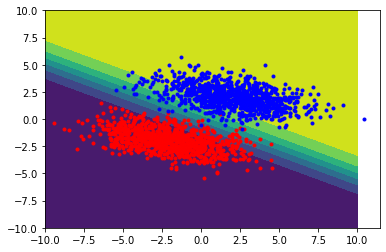

In [29]:
z = output.reshape(100, 100)
pl.plot(x_data[y_data==0, 0], x_data[y_data==0, 1], '.', color='red')
pl.plot(x_data[y_data==1, 0], x_data[y_data==1, 1], '.', color='blue')
pl.contourf(xx, yy, z);

# Trying to achieve 100% accuracy with deep networks

## Build model with multiple layers

In [58]:
model2 = models.Sequential([
    layers.Input(shape=(2,)),
    layers.Dense(100, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

model2.compile(
    loss=losses.BinaryCrossentropy(),
    optimizer=optimizers.Adam(learning_rate=0.01),
    metrics=['acc'],
)

model2.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 100)               300       
_________________________________________________________________
dense_33 (Dense)             (None, 32)                3232      
_________________________________________________________________
dense_34 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 17        
Total params: 4,077
Trainable params: 4,077
Non-trainable params: 0
_________________________________________________________________


In [54]:
model2.fit(x_data, y_data, epochs=100)

Epoch 1/100
63/63 [==============================] - 0s 1ms/step - loss: 0.1749 - acc: 0.9320
Epoch 2/100
63/63 [==============================] - 0s 1ms/step - loss: 0.0079 - acc: 0.9977
Epoch 3/100
63/63 [==============================] - 0s 1ms/step - loss: 0.0118 - acc: 0.9964
Epoch 4/100
63/63 [==============================] - 0s 1ms/step - loss: 0.0080 - acc: 0.9979
Epoch 5/100
63/63 [==============================] - 0s 1ms/step - loss: 0.0083 - acc: 0.9972
Epoch 6/100
63/63 [==============================] - 0s 1ms/step - loss: 0.0126 - acc: 0.9947
Epoch 7/100
63/63 [==============================] - 0s 1ms/step - loss: 0.0071 - acc: 0.9971
Epoch 8/100
63/63 [==============================] - 0s 1ms/step - loss: 0.0087 - acc: 0.9967
Epoch 9/100
63/63 [==============================] - 0s 1ms/step - loss: 0.0164 - acc: 0.9947
Epoch 10/100
63/63 [==============================] - 0s 1ms/step - loss: 0.0030 - acc: 0.9997
Epoch 11/100
63/63 [==============================] - 0s 1m

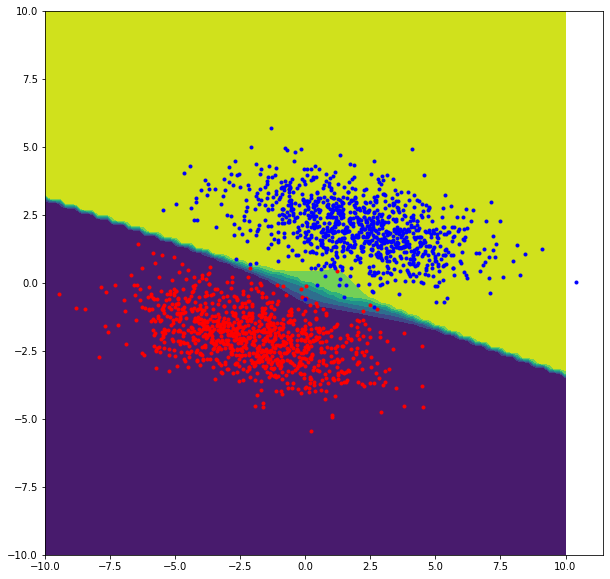

In [55]:
output = model2.predict(input)
z = output.reshape(100, 100)
pl.figure(figsize=(10,10))
pl.plot(x_data[y_data==0, 0], x_data[y_data==0, 1], '.', color='red')
pl.plot(x_data[y_data==1, 0], x_data[y_data==1, 1], '.', color='blue')
pl.contourf(xx, yy, z);